In [268]:
import pandas as pd

In [269]:
churn_data = pd.read_csv("C:\IDE\SkillFactory\PY_13_Визуализация\Churn_for_Bank_Customers\churn.csv")
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [270]:

churn_data1 = churn_data.copy() 

In [271]:
churn_data.drop(['RowNumber'],axis=1,inplace=True)

9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


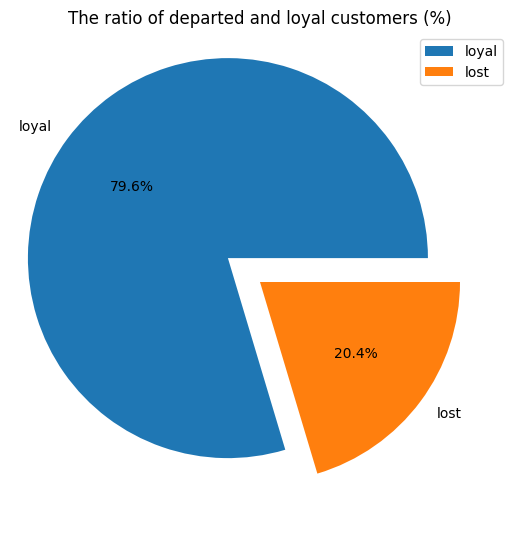

In [274]:
churn_data['status'] = churn_data['Exited'].apply(lambda x: 'loyal' if x == 0 else 'lost')
loyalty_ratio = churn_data['status'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
plt.title('The ratio of departed and loyal customers (%)')

axes.pie(
    loyalty_ratio,
    labels=loyalty_ratio.index,
    autopct='%.1f%%',
    explode = [0.2, 0]
);

axes.legend()

### Как мы видим из графика, за рассматриваемый промежуток времени банком было потеряно около 20% клиентов. Какая пропроция в разрезе балансов рассмотрим в графике ниже.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Balances distribution')

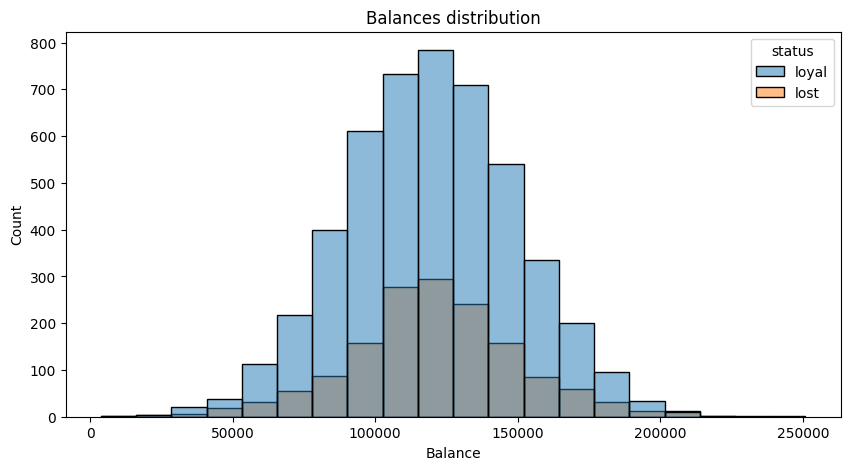

In [336]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)
histplot = sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500], 
    x='Balance', 
    bins=20,
    hue ='status'
)
histplot.set_title('Balances distribution')



### Большая часть клиентов имеет на счетах сумму от 90 000 до 150 000 у.е. Стоит отметить,что существенная часть всего баланса- это балансы "потерянных" клиентов. 


9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

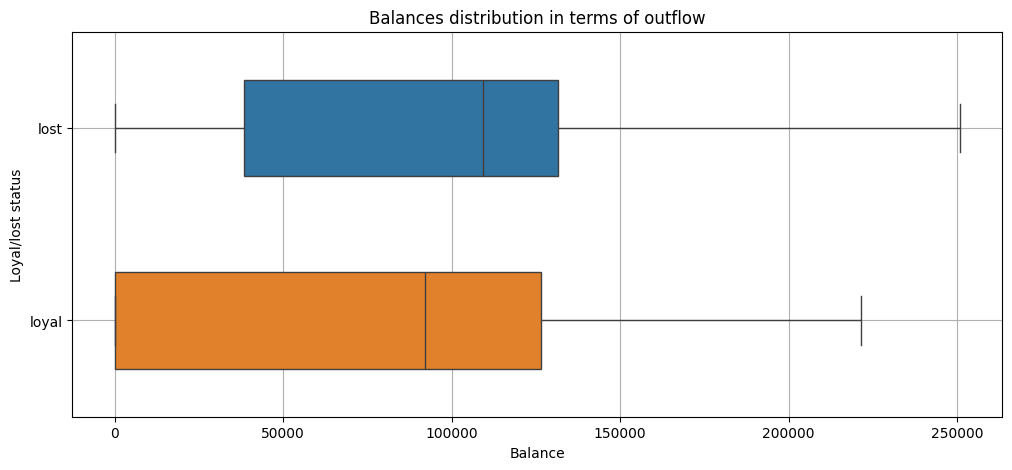

In [325]:
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='status',
    hue = 'status',
    orient='h',
    width=0.5,
)
boxplot.set_title('Balances distribution in terms of outflow');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Loyal/lost status');
boxplot.grid()

### Из графика видно, что произошел отток клиентов с бОльшими суммами на счете. Максимум и медиана у ушедших больше, чем у оставшихся. Могу предположить, что изменилась процентная ставка для накопительного счета (наиболее вероятно), также могли сыграть такие факторы как изменение курса валюты, изменение политико-экономической ситуации в стране и тд ( и вообще множество причин, почему люди могут побежать снимать деньги  ).

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

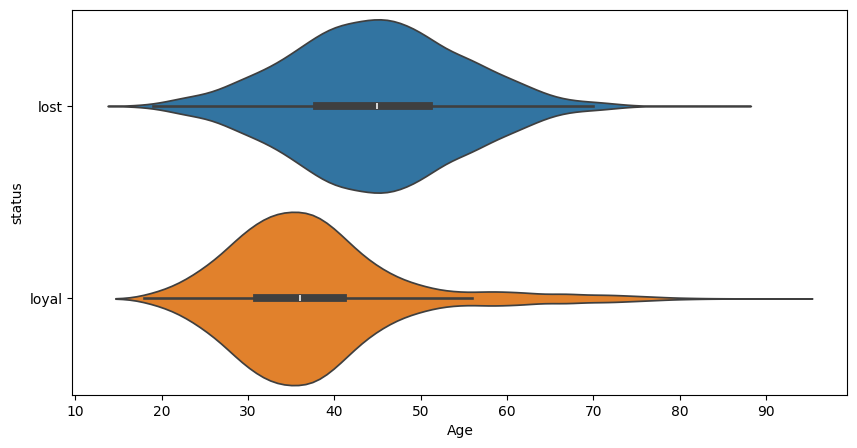

In [320]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.violinplot(
    data=churn_data,
    x='Age',
    y='status',
    hue = 'status',
    orient='h',
    width=0.9,
)

### Из этих "капелек" видно, что основная плотность в разрезе взаимосвязи возраста и оттока приходится на людей возраста 40-50 лет, тогда как оставшиеся люди в основе своей люди возраста от 30 до 40 лет. Чтобы увидеть потенциальные вбросы, рассмотрим следующий график.

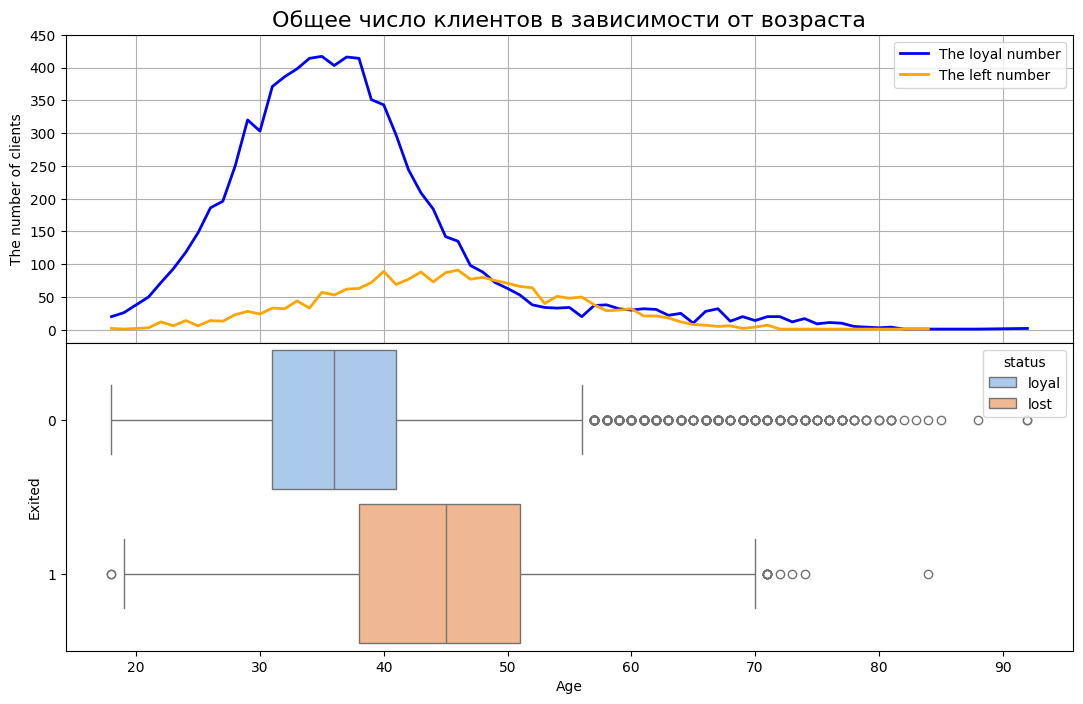

In [337]:
age_data_1 = churn_data[churn_data['Exited'] == 1]
age_grouped_1 = age_data_1.groupby(['Age'])[['Exited']].sum()
age_data_0 = churn_data[churn_data['Exited'] == 0]
age_grouped_0 = age_data_0.groupby(['Age'])[['Exited']].count()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 8))
plt.subplots_adjust(hspace=.0)
axes[0].plot(age_grouped_0['Exited'], label='The loyal number', c='blue', lw=2)
axes[0].plot(age_grouped_1['Exited'], label='The left number', c= 'orange', lw=2)


#установка параметров отображения
axes[0].set_title('Общее число клиентов в зависимости от возраста', fontsize=16)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('The number of clients')
axes[0].set_yticks(range(0, 500, 50))
axes[0].xaxis.set_tick_params(rotation=10)
axes[0].grid()
axes[0].legend();

#sn.lineplot(x="Year", y="User Rating", data=data) 

boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    hue = 'status',
    orient='h',
    width=0.9,
    palette='pastel',
    ax=axes[1]
)


                         

### На данном графике мы видим, благодаря "коробочкам", что потенциальные вбросы вероятны у ушедших в возрасте 70 лет. А также у оставшихся в возрасте от 55 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

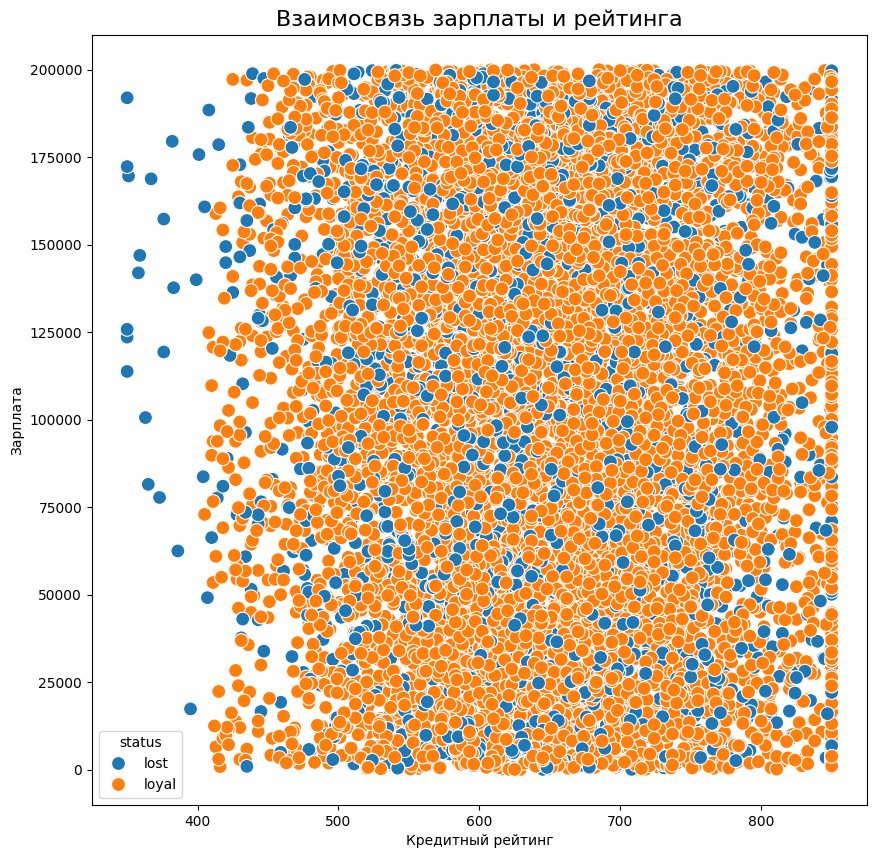

In [282]:
fig = plt.figure(figsize=(10, 10))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='status',
    s=100,
    sizes=(30, 100)

)
scatterplot.set_title('Взаимосвязь зарплаты и рейтинга', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Зарплата');

### Вывод. Взаимосвязь отсутствует.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

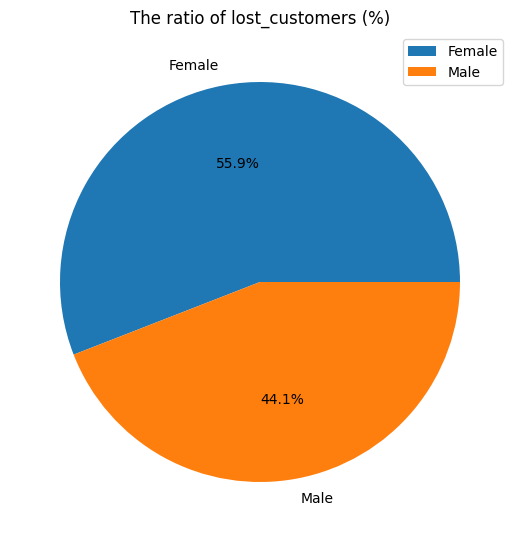

In [283]:
sex_ratio = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
plt.title('The ratio of lost_customers (%)')

axes.pie(
    sex_ratio,
    labels=sex_ratio.index,
    autopct='%.1f%%',
    explode = [0, 0]
);

axes.legend()

### Вывод. Большинство уходящих клиентов - женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 1.0, 'Отток клиентов в зависимости от количества услуг')

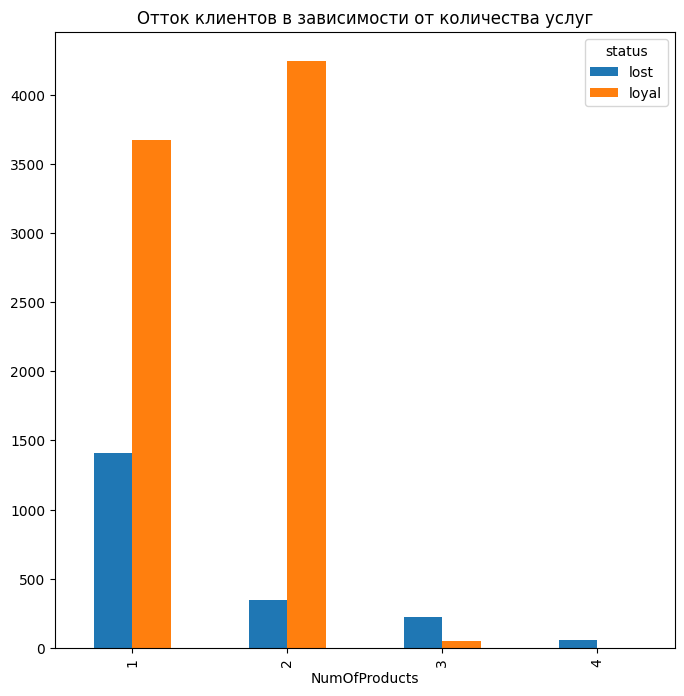

In [284]:
pivot = churn_data.pivot_table ( values='CustomerId',
                               index='NumOfProducts',
                               columns='status',
                               aggfunc = 'count',
                               fill_value=0)
fig_7,axes_7 = plt.subplots(figsize=(8,8))

pivot.plot(kind='bar',ax=axes_7)
plt.title('Отток клиентов в зависимости от количества услуг')


### Из графика видно, что клиенты Банка в основном пользуются максимум двумя продуктами. А среди ушедших большинство использовало один банковский продукт.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

<Axes: xlabel='IsActiveMember'>

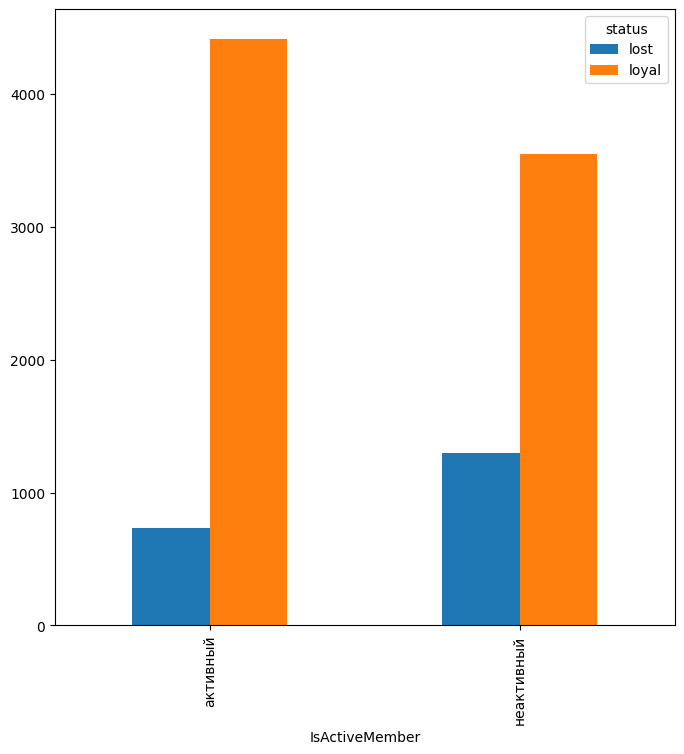

In [285]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].map(lambda x: 'неактивный' if x == 0 else 'активный')
pivot = churn_data.pivot_table ( values='CustomerId',
                               index='IsActiveMember',
                               columns='status',
                               aggfunc = 'count',
                               fill_value=0)
fig_7,axes_7 = plt.subplots(figsize=(8,8))
pivot.plot(kind='bar',ax=axes_7)
#plt.title('Отток клиентов и статус активного клиента')


### Как мы узнали ранее - большинство ушедших использовало всего один банковский продукт и как мы видим сейчас из графика были "неактивными". Из графика также очевидно, что среди оставшихся клиентов также немало неактивных, значит, они в группе риска.Можно предложить банку, увеличить количество привлекательных программ, потому что люди у них пользуются малым количеством продуктов и уходят в оснвном потому, что по всей видимости остальные банковские продукты непривлекательны.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [299]:


pivot_data = choropleth_data.pivot_table(
    values='Exited', 
    index=['Geography', 'Tenure'], 
    aggfunc='sum'
).reset_index()


fig = px.choropleth(
    data_frame=pivot_data, # Обновленный DataFrame
    locations="Geography", # Столбец с локациями
    locationmode="country names", # Режим сопоставления локаций
    color="Exited", # От чего зависит цвет (сумма ушедших клиентов)
    hover_name="Geography", # Что показывать при наведении на страну
    animation_frame="Tenure", # Бегунок анимации
    range_color=[0, pivot_data['Exited'].max()], # Диапазон цвета
    title="Отток клиентов по странам и времени владения счетом",
    width=800, 
    height=500,
    color_continuous_scale="Reds"
)

fig.show()

### Наибольший отток в Германии, наименьший - в Испании.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [301]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [302]:
churn_data['CreditScoreCat']= churn_data['CreditScore'].apply(get_credit_score_cat)

In [318]:
pivot_data = round(churn_data.pivot_table(
    values='Exited', 
    index='CreditScoreCat',
    columns='Tenure', 
    aggfunc='mean',
    fill_value=0),2)
display(pivot_data)


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


In [319]:
fig = px.imshow(pivot_data, text_auto = True, title = 'Тепловая карта распределения среднего значения оттока клиентов')
fig.show()

### Чаще всего уходят люди с плохим кредитным рейтингом, как видно на таблице.